<a href="https://colab.research.google.com/github/KodumuruRaja/Performance-Metrics/blob/main/Performance-Metrics-(All%20techniques%20for%20Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
y_pred=np.zeros(10000)
y_test=np.zeros(10000)
indices1=np.random.randint(0,10000,300)
indices2=np.random.randint(0,10000,400)
indices3=np.random.randint(0,10000,500)
y_pred[indices1]=1
y_test[indices2]=1
y_pred[indices3]=1
y_test[indices3]=1

In [ ]:
np.sum(y_test)

855.0

In [ ]:
np.sum(y_pred)

767.0

# **1) Classification Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy_score :',accuracy_score(y_test,y_pred))

Accuracy_score : 0.9372


# **2) Confusion Matrix**
#i) FPR (Type 1 Error)
#ii) FNR (Type 2 Error)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[8875,  270],
       [ 358,  497]])

# **3) Classification Report**
#i) Precision
#ii) Recall
#iii) F1-Score
#iv) Support

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      9145
         1.0       0.65      0.58      0.61       855

    accuracy                           0.94     10000
   macro avg       0.80      0.78      0.79     10000
weighted avg       0.93      0.94      0.94     10000



# **4) PR Curve**

In [ ]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)

In [ ]:
precision

array([0.0855    , 0.64797914, 1.        ])

In [ ]:
recall

array([1.        , 0.58128655, 0.        ])

In [ ]:
thresholds

array([0., 1.])

# **5) AUC,ROC Curve**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [ ]:
from sklearn.model_selection import train_test_split
x,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [ ]:
x.shape,y.shape

((2000, 20), (2000,))

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# Applying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
ytrain_pred=rf.predict_proba(x_train)
print('Rf train roc_auc : {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf.predict_proba(x_test)
print('RF test roc_auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

Rf train roc_auc : 1.0
RF test roc_auc: 0.9808111111111111


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train, y_train)
ytrain_pred = log_classifier.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [ ]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(x_train, y_train)
ytrain_pred = ada_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
ytrain_pred = knn_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


# Now we focus on selecting the best threshold for maximum accuracy

In [ ]:
pred=[]
for model in [rf,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9845444444444444


In [ ]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,1.00,0.966929,0.538202,0.8
3,0.96,0.761539,0.509875,0.8
4,0.56,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.04,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [ ]:
final_prediction

0      0.885262
1      0.118323
2      0.826283
3      0.757853
4      0.557447
         ...   
595    0.123840
596    0.120345
597    0.876697
598    0.165717
599    0.837357
Length: 600, dtype: float64

In [ ]:
# Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.91156694, 0.91077475, 0.81056516,
       0.8105558 , 0.80728341, 0.80662833, 0.77742916, 0.77571156,
       0.76553202, 0.76537124, 0.7391922 , 0.73887362, 0.70869595,
       0.70643711, 0.67756113, 0.66243537, 0.61366701, 0.60925354,
       0.60462652, 0.59114346, 0.58906376, 0.58800386, 0.5790152 ,
       0.57736186, 0.56149047, 0.56127948, 0.54838469, 0.53389283,
       0.52355932, 0.47616892, 0.45990225, 0.45472765, 0.45169266,
       0.42514281, 0.4246034 , 0.41936151, 0.41879719, 0.34747682,
       0.34086612, 0.23904122, 0.23890421, 0.23448424, 0.23396893,
       0.20602808, 0.20598417, 0.12034501, 0.1203351 , 0.10632697])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()


,thresholds,accuracy
33,0.454728,0.960000
35,0.425143,0.958333
34,0.451693,0.958333
32,0.459902,0.958333
31,0.476169,0.958333


In [ ]:
accuracy_ls

,thresholds,accuracy
33,0.454728,0.960000
35,0.425143,0.958333
34,0.451693,0.958333
32,0.459902,0.958333
31,0.476169,0.958333
37,0.419362,0.956667
36,0.424603,0.956667
30,0.523559,0.956667
29,0.533893,0.956667
28,0.548385,0.956667


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

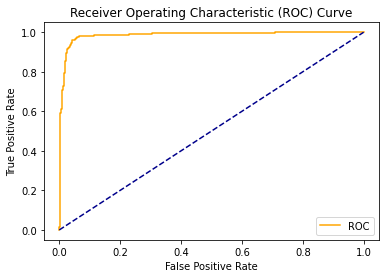

In [ ]:
plot_roc_curve(fpr,tpr)